In [2]:
pip install pymysql

   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.8 kB ? eta -:--:--
   ------------------ --------------------- 20.5/44.8 kB 320.0 kB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 kB 367.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymysql

In [17]:
host = ''
user = ''
password = ''
database = ''

# Connect to the MySQL database
connection = pymysql.connect(host=host,
                             user=user,
                             password=password,
                             database=database)

In [18]:
from datetime import datetime, timedelta

In [19]:
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

In [20]:
start_date_str

'2024-04-22'

In [21]:
end_date_str

'2024-04-29'

In [22]:
query = f"SELECT date, rate FROM rates WHERE date BETWEEN '{start_date_str}' AND '{end_date_str}'"

In [23]:
cursor = connection.cursor()
cursor.execute(query)
data = cursor.fetchall()

In [24]:
data

((datetime.date(2024, 4, 22), Decimal('57.73')),
 (datetime.date(2024, 4, 23), Decimal('57.84')),
 (datetime.date(2024, 4, 24), Decimal('57.61')),
 (datetime.date(2024, 4, 25), Decimal('57.61')),
 (datetime.date(2024, 4, 26), Decimal('57.36')),
 (datetime.date(2024, 4, 27), Decimal('57.40')),
 (datetime.date(2024, 4, 28), Decimal('57.40')))

In [25]:
cursor.close()
connection.close()

In [26]:
data

((datetime.date(2024, 4, 22), Decimal('57.73')),
 (datetime.date(2024, 4, 23), Decimal('57.84')),
 (datetime.date(2024, 4, 24), Decimal('57.61')),
 (datetime.date(2024, 4, 25), Decimal('57.61')),
 (datetime.date(2024, 4, 26), Decimal('57.36')),
 (datetime.date(2024, 4, 27), Decimal('57.40')),
 (datetime.date(2024, 4, 28), Decimal('57.40')))

In [32]:
import numpy as np

rates = [float(row[1]) for row in data]

rates_array = np.array(rates)

past_columns = []
for i in range(7):
    past_columns.append(f"past_{i}")

preprocessed_data = np.zeros((len(rates) - 6, 7))
for i in range(6, len(rates)):
    preprocessed_data[i - 6] = rates[i-6:i+1][::-1]

In [33]:
preprocessed_data

array([[57.4 , 57.4 , 57.36, 57.61, 57.61, 57.84, 57.73]])

In [10]:
import joblib

model = joblib.load('model.pkl')

In [9]:
predictions = model.predict(preprocessed_data)

NameError: name 'preprocessed_data' is not defined

In [36]:
predictions

array([[56.74224514, 56.75664544, 56.76898127, 56.76901942, 56.79742601,
        56.79959797, 56.7943261 ]])

In [22]:
dummy_data = [[59.56, 58.21, 56.12, 57.12, 51.21, 56.89, 55.30]]

In [23]:
predictions_dummy = model.predict(dummy_data)

C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [24]:
predictions_dummy

array([[57.66937545, 57.50033519, 57.13680116, 57.36805551, 57.33046104,
        56.24695397, 56.20270695]])

In [21]:
dummy_data = [
    [[59.56, 58.21, 56.12, 57.12, 51.21, 56.89, 55.30]],
    [[60.32, 57.89, 58.12, 59.78, 54.67, 58.90, 56.78]],
    [[58.90, 57.00, 55.45, 56.78, 52.34, 57.12, 54.90]],
    [[61.20, 59.00, 57.34, 60.00, 55.89, 59.45, 57.23]],
    [[57.89, 55.90, 53.45, 56.12, 50.67, 55.90, 54.00]],
    [[62.00, 60.56, 58.67, 61.00, 56.78, 60.90, 58.90]],
    [[58.34, 56.00, 54.23, 57.00, 51.78, 56.34, 54.45]],
    [[63.00, 61.23, 59.78, 62.34, 57.90, 61.45, 59.00]],
    [[59.45, 57.67, 55.78, 58.00, 53.00, 57.90, 56.12]],
    [[61.78, 59.45, 58.00, 60.56, 56.12, 59.00, 57.67]]
]

predictions_dummy = []

for data_point in dummy_data:
    prediction = model.predict(data_point) 
    predictions_dummy.append(prediction)

for i, prediction in enumerate(predictions_dummy):
    print(f"Prediction {i + 1}: {prediction}")


Prediction 1: [[57.66937545 57.50033519 57.13680116 57.36805551 57.33046104 56.24695397
  56.20270695]]
Prediction 2: [[59.08654966 58.72299314 58.19230242 58.78685013 58.94083547 58.38436632
  57.75918293]]
Prediction 3: [[57.02066363 56.97313915 56.62495416 56.85754333 56.84251671 56.01689895
  55.78627563]]
Prediction 4: [[59.51884969 59.26423013 58.90147166 59.20554707 59.39136661 58.61224175
  58.24153828]]
Prediction 5: [[56.12321938 55.88488416 55.53589853 55.86624309 55.91205326 55.01729977
  54.55769624]]
Prediction 6: [[60.76109537 60.54254493 60.29151067 60.63058096 60.69686033 60.01283747
  59.47370014]]
Prediction 7: [[56.65807447 56.33895242 55.92946984 56.31923535 56.45360754 55.65097882
  55.1583775 ]]
Prediction 8: [[61.61563513 61.27852351 60.8865435  61.28938195 61.52953277 60.69114992
  60.29784   ]]
Prediction 9: [[57.97816285 57.75540283 57.44296541 57.80053568 57.81680793 57.08543866
  56.55178899]]
Prediction 10: [[60.02958131 59.6080847  59.21223668 59.45781688

C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid featu

In [26]:
predictions_dummy = [[
    57.81,
    57.70,
    57.68,
    57.40,
    57.60,
    57.61,
    57.46
    ]
]

prediction = model.predict(predictions_dummy) 

prediction

C:\Users\Nikola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([[57.55703551, 57.56186037, 57.70244709, 57.57981556, 57.61316589,
        57.51625201, 57.54277456]])

In [27]:
real_data =  [[
    57.73,
    57.84,
    57.61,
    57.61,
    57.36,
    57.40,
    57.40
]]

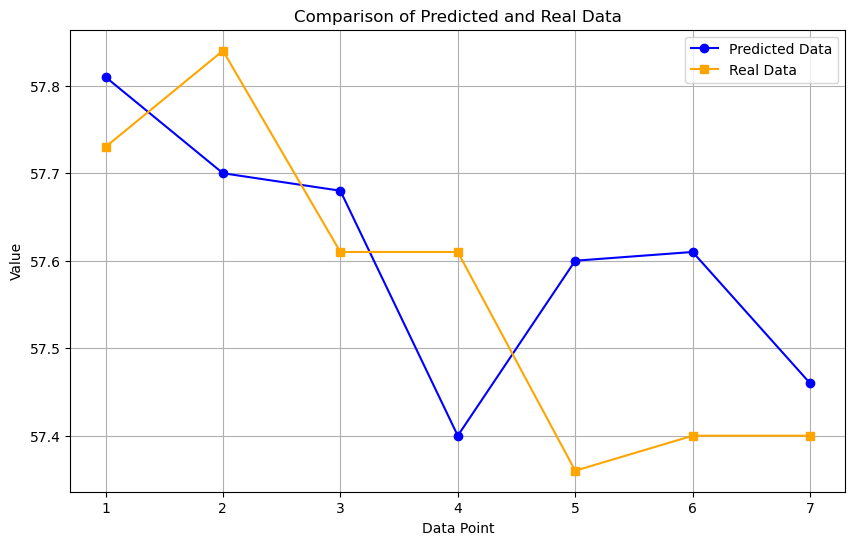

In [30]:
import matplotlib.pyplot as plt

# Predicted data
predictions_dummy = [
    57.81,
    57.70,
    57.68,
    57.40,
    57.60,
    57.61,
    57.46
]

# Real data
real_data = [
    57.73,
    57.84,
    57.61,
    57.61,
    57.36,
    57.40,
    57.40
]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(predictions_dummy) + 1), predictions_dummy, marker='o', linestyle='-', color='blue', label='Predicted Data')
plt.plot(range(1, len(real_data) + 1), real_data, marker='s', linestyle='-', color='orange', label='Real Data')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison of Predicted and Real Data')
plt.xticks(range(1, len(predictions_dummy) + 1))
plt.legend()
plt.grid(True)
plt.show()